<a href="https://colab.research.google.com/github/Sa637/resume/blob/main/iamge_translate_using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def tensor2im(image_tensor):
    # Move to CPU, convert to numpy, and detach from the computation graph
    image_numpy = image_tensor.cpu().float().numpy()
    # Transpose the image from (C, H, W) to (H, W, C)
    image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    return image_numpy.astype(np.uint8)

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def save_visuals(images, filepath):
    # 'images' could be a list or dictionary of image tensors
    grid = make_grid(images, nrow=3, normalize=True)
    np_grid = grid.cpu().numpy().transpose((1, 2, 0))

    plt.figure(figsize=(10, 10))
    plt.imshow(np_grid)
    plt.axis('off')
    plt.savefig(filepath)
    plt.close()

In [ ]:
!ls /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/': No such file or directory


In [ ]:
!ls /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/': No such file or directory


In [ ]:
!ls /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/': No such file or directory


In [ ]:
!python test.py --dataroot ./datasets/horse2zebra/testA --name horse2zebra --model test --no_dropout

python3: can't open file '/content/test.py': [Errno 2] No such file or directory


In [ ]:
generated_image_path = "/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/fake_B.png"

In [ ]:
!ls /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/': No such file or directory


In [ ]:
!python //content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed.zip \
  --dataroot /content/datasets/horse2zebra \
  --name horse2zebra \
  --model test \
  --no_dropout

python3: can't open file '//content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed.zip': [Errno 2] No such file or directory


In [ ]:
import torchvision

In [ ]:
!bash scripts/download_cyclegan_model.sh horse2zebra

bash: scripts/download_cyclegan_model.sh: No such file or directory


In [ ]:
!python test.py \
  --dataroot /content/datasets/horse2zebra \
  --name horse2zebra \
  --model test \
  --no_dropout

python3: can't open file '/content/test.py': [Errno 2] No such file or directory


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Find the generated image
generated_image_path = glob.glob(
    "/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/fake_B.png"
)

if generated_image_path:
    zebra_image = mpimg.imread(generated_image_path[0])
    plt.imshow(zebra_image)
    plt.axis("off")
    plt.title("Generated Zebra Image")
    plt.show()
else:
    print("❌ Generated image not found!")

❌ Generated image not found!


In [ ]:
ls /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/checkpoints/horse2zebra/web/images/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/checkpoints/horse2zebra/web/images/': No such file or directory


In [ ]:
ls /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/results/horse2zebra/latest/images/': No such file or directory


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Find generated images
image_paths = glob.glob("/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/checkpoints/horse2zebra/web/images/*.png")

if image_paths:
    for img_path in image_paths:
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Training Image: {img_path.split('/')[-1]}")
        plt.show()
else:
    print("❌ No images found! Check if training is running correctly.")

❌ No images found! Check if training is running correctly.


In [ ]:
!pip install visdom dominate

In [ ]:

# ==========================================================
# 🔁 Image Translation using CycleGAN (Horse ➝ Zebra)
# ==========================================================

# Step 1: Install dependencies
!pip install -q torch torchvision matplotlib gdown

# Step 2: Import libraries
import torch
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch.nn as nn

# Step 3: Define the Generator model (ResNet from CycleGAN)
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(channels, channels, kernel_size=3),
            nn.InstanceNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(channels, channels, kernel_size=3),
            nn.InstanceNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(3, 64, kernel_size=7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(inplace=True)
        ]

        for _ in range(9):
            model += [ResidualBlock(256)]

        model += [
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),

            nn.ReflectionPad2d(3),
            nn.Conv2d(64, 3, kernel_size=7),
            nn.Tanh()
        ]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

# Step 4: Download pretrained horse2zebra model
!gdown --id 1Dvk2TVQckuX3J7lXwTTyluQjJTrKw9TV -O horse2zebra.pth

# Step 5: Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Generator().to(device)
model.load_state_dict(torch.load('./horse2zebra.pth', map_location=device))
model.eval()

# Step 6: Define image loader
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)

# Step 7: Upload your image
from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))

# Step 8: Run translation
input_image = load_image(image_path).to(device)
with torch.no_grad():
    translated_image = model(input_image)

# Step 9: Save and display
output_path = "translated_image.png"
save_image((translated_image + 1) / 2, output_path)

# Step 10: Show original and translated images
def show_images(original, translated):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].imshow(Image.open(original))
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    axes[1].imshow(Image.open(translated))
    axes[1].set_title("Translated Image")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()

show_images(image_path, output_path)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Dvk2TVQckuX3J7lXwTTyluQjJTrKw9TV

but Gdown can't. Please check connections and permissions.


EOFError: 

In [ ]:
!Python -m visdom.server

/bin/bash: line 1: Python: command not found


In [ ]:

!python train.py --dataroot /content/datasets/horse2zebra --name horse2zebra --model cycle_gan

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
!python train.py \
  --dataroot /content/datasets/horse2zebra \
  --name horse2zebra \
  --model cycle_gan \
  --display_id 0

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
!p-m visdom.server
!python train.py --dataroot /content/datasets/horse2zebra --name horse2zebra --model cycle_gan

/bin/bash: line 1: p-m: command not found
python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Find generated images
image_paths = glob.glob("/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/checkpoints/horse2zebra/web/images/*.png")

if image_paths:
    for img_path in image_paths:
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Generated Image: {img_path.split('/')[-1]}")
        plt.show()
else:
    print("❌ No images found! Check training outputs.")

❌ No images found! Check training outputs.


In [ ]:
!ls -R /content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/checkpoints/

ls: cannot access '/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/checkpoints/': No such file or directory


In [ ]:
!python test.py --dataroot /content/datasets/horse2zebra --name horse2zebra --model cycle_gan --phase test

python3: can't open file '/content/test.py': [Errno 2] No such file or directory


In [ ]:
import zipfile
import os

zip_path = "/content/ACL-GAN-master (1).zip"
extract_path = "/content/ACL-GAN-master"

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete!")

FileNotFoundError: [Errno 2] No such file or directory: '/content/ACL-GAN-master (1).zip'

In [ ]:
!ls -R /content/ACL-GAN-master/

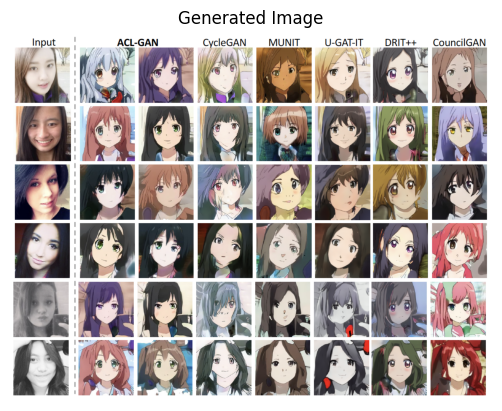

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/ACL-GAN-master/ACL-GAN-master/figures/selfie2anime.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")


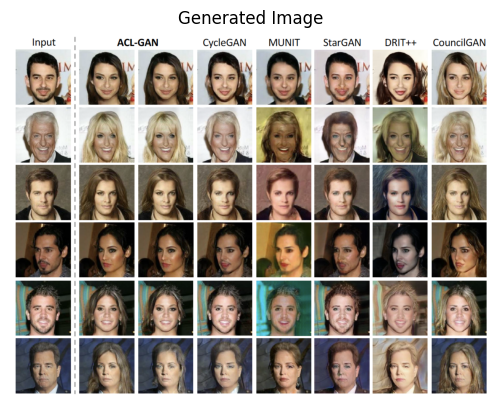

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/ACL-GAN-master/ACL-GAN-master/figures/male2female.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")


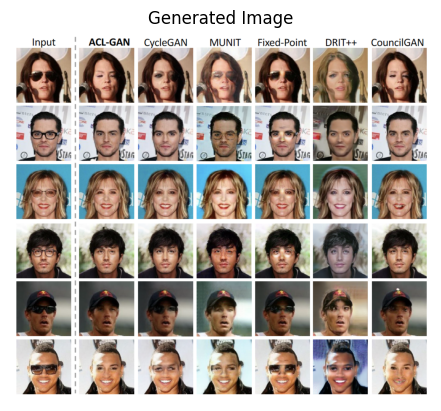

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/ACL-GAN-master/ACL-GAN-master/figures/glasses_removal.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

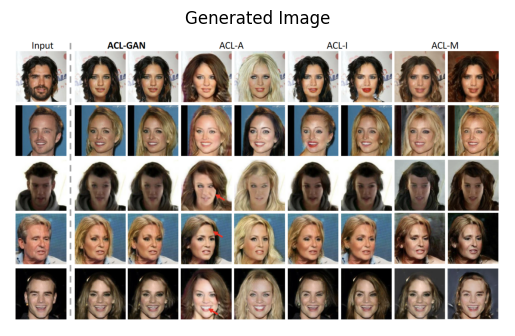

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/ACL-GAN-master/ACL-GAN-master/figures/ablation_study.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths
image_path = "/content/ACL-GAN-master/ACL-GAN-master/inputs/test_male.jpg"
output_dir = "/content/ACL-GAN-master/ACL-GAN-master/results"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Run ACL-GAN model
!python /content/ACL-GAN-master/ACL-GAN-master/test.py --dataroot {image_path} --name acl_gan --model acl_gan --phase test --results_dir {output_dir}

# Locate the output image
output_image_path = os.path.join(output_dir, "test_male_fake.png")  # Change based on actual output

# Display the image if it exists
if os.path.exists(output_image_path):
    img = mpimg.imread(output_image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image (Male → Female)")
    plt.show()
else:
    print(f"❌ No output image found at {output_image_path}. Check model logs.")


usage: test.py [-h] [--config CONFIG] [--input INPUT] [--output_folder OUTPUT_FOLDER]
               [--checkpoint CHECKPOINT] [--style STYLE] [--a2b A2B] [--seed SEED]
               [--num_style NUM_STYLE] [--synchronized] [--output_only]
               [--output_path OUTPUT_PATH] [--trainer TRAINER]
test.py: error: unrecognized arguments: --dataroot /content/ACL-GAN-master/ACL-GAN-master/inputs/test_male.jpg --name acl_gan --model acl_gan --phase test --results_dir /content/ACL-GAN-master/ACL-GAN-master/results
❌ No output image found at /content/ACL-GAN-master/ACL-GAN-master/results/test_male_fake.png. Check model logs.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/ACL-GAN-master/ACL-GAN-master/inputs/test_male.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

❌ Image not found at /content/ACL-GAN-master/ACL-GAN-master/inputs/test_male.jpg. Check your extracted files.


In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed.zip"
extract_path = "/content/"

# Extract the files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
os.listdir(extract_path)


['.config',
 'ACL-GAN-master',
 'junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed',
 'ModifiedPix2Pix-master.zip',
 'junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed.zip',
 'ACL-GAN-master (1).zip',
 'GeneratorHtoZ_25.h5.zip',
 'sample_data']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/imgs/edges2cats.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

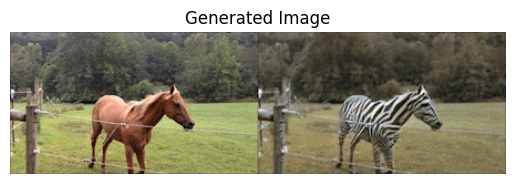

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed/imgs/horse2zebra.gif"
try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/ModifiedPix2Pix-master.zip"
extract_path = "/content/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
os.listdir(extract_path)


['.config',
 'ModifiedPix2Pix-master',
 'ACL-GAN-master',
 'junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed',
 'ModifiedPix2Pix-master.zip',
 'junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed.zip',
 'ACL-GAN-master (1).zip',
 'GeneratorHtoZ_25.h5.zip',
 'sample_data']

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balraj98/horse2zebra-dataset")

print("Path to dataset files:", path)

100%|██████████| 111M/111M [00:01<00:00, 93.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/balraj98/horse2zebra-dataset/versions/1


In [ ]:
from IPython.display import clear_output as clear
!pip install tensorflow-addons
clear()


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Extract ZIP file
zip_path = "/content/archive (14).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Load images (assuming they are inside a folder within extracted path)
image_folder = os.path.join(extract_path, os.listdir(extract_path)[0])
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Step 3: Displ


BadZipFile: File is not a zip file

In [ ]:
import os

zip_path = "/content/GeneratorHtoZ_25.h5.zip"

# Check if file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"❌ File not found: {zip_path}")

# Check file size
file_size = os.path.getsize(zip_path)
if file_size == 0:
    raise ValueError("❌ Error: ZIP file is empty!")

print(f"✅ File found! Size: {file_size / (1024 * 1024):.2f} MB")


✅ File found! Size: 37.92 MB


In [ ]:
import shutil

extract_path = "/content/extracted_model"

try:
    shutil.unpack_archive(zip_path, extract_path)
    print("✅ Extraction successful!")
except Exception as e:
    print(f"❌ Extraction failed: {e}")


❌ Extraction failed: [Errno 22] Invalid argument


In [ ]:
!rm -f /content/GeneratorHtoZ_25.h5.zip  # Remove the corrupted file
!wget "YOUR_DOWNLOAD_LINK_HERE" -O /content/GeneratorHtoZ_25.h5.zip


--2025-02-25 10:23:04--  http://your_download_link_here/
Resolving your_download_link_here (your_download_link_here)... failed: Name or service not known.
wget: unable to resolve host address ‘your_download_link_here’


In [ ]:
import zipfile
import os

zip_path = "/content/GeneratorHtoZ_25.h5.zip"
extract_path = "/content/extracted_model"

# Ensure the file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"❌ File not found: {zip_path}")

# Extract ZIP file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Extraction successful! Files extracted to: {extract_path}")
except zipfile.BadZipFile:
    print("❌ Error: The ZIP file is corrupt or invalid.")
except Exception as e:
    print(f"❌ Extraction failed: {e}")


❌ Error: The ZIP file is corrupt or invalid.


In [ ]:
import zipfile
import os

zip_path = "/content/GeneratorHtoZ_25.h5.zip"
extract_path = "/content/extracted_model"

# Ensure the file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"❌ File not found: {zip_path}")

# Extract ZIP file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Extraction successful! Files extracted to: {extract_path}")
except zipfile.BadZipFile:
    print("❌ Error: The ZIP file is corrupt or invalid.")
except Exception as e:
    print(f"❌ Extraction failed: {e}")


❌ Error: The ZIP file is corrupt or invalid.


In [ ]:
import zipfile

zip_path = "/content/GeneratorHtoZ_25.h5.zip"

# Check if ZIP file is valid
if zipfile.is_zipfile(zip_path):
    print("✅ The ZIP file is valid.")
else:
    print("❌ The ZIP file is corrupt.")


❌ The ZIP file is corrupt.


In [ ]:
!wget -O /content/GeneratorHtoZ_25.h5.zip "YOUR_DOWNLOAD_LINK_HERE"


--2025-02-25 10:45:46--  http://your_download_link_here/
Resolving your_download_link_here (your_download_link_here)... failed: Name or service not known.
wget: unable to resolve host address ‘your_download_link_here’


In [ ]:
!unzip -o /content/GeneratorHtoZ_25.h5.zip -d /content/extracted_model


Archive:  /content/GeneratorHtoZ_25.h5.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/GeneratorHtoZ_25.h5.zip or
        /content/GeneratorHtoZ_25.h5.zip.zip, and cannot find /content/GeneratorHtoZ_25.h5.zip.ZIP, period.


In [ ]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
import os

rar_path = "/content/trainA (1).rar"
extract_path = "/content/trainA_extracted"

# Create extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract .rar file
!unrar x "$rar_path" "$extract_path"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Unexpected end of archive

Extracting from /content/trainA (1).rar

Extracting  /content/trainA_extracted/n02381460_105.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_108.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_117.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_122.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_125.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_128.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_135.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_153.jpg                    0%  OK 
Extracting  /content/trainA_extracted/n02381460_155.jpg                    1%  OK 
Extracting  /content/trainA_e

In [ ]:
import os

files = os.listdir(extract_path)
print("Extracted files:", files)


Extracted files: ['n02381460_474.jpg', 'n02381460_122.jpg', 'n02381460_902.jpg', 'n02381460_769.jpg', 'n02381460_856.jpg', 'n02381460_582.jpg', 'n02381460_706.jpg', 'n02381460_211.jpg', 'n02381460_419.jpg', 'n02381460_798.jpg', 'n02381460_545.jpg', 'n02381460_525.jpg', 'n02381460_697.jpg', 'n02381460_834.jpg', 'n02381460_182.jpg', 'n02381460_476.jpg', 'n02381460_755.jpg', 'n02381460_849.jpg', 'n02381460_552.jpg', 'n02381460_451.jpg', 'n02381460_743.jpg', 'n02381460_186.jpg', 'n02381460_235.jpg', 'n02381460_543.jpg', 'n02381460_384.jpg', 'n02381460_852.jpg', 'n02381460_424.jpg', 'n02381460_726.jpg', 'n02381460_395.jpg', 'n02381460_285.jpg', 'n02381460_784.jpg', 'n02381460_236.jpg', 'n02381460_437.jpg', 'n02381460_396.jpg', 'n02381460_567.jpg', 'n02381460_411.jpg', 'n02381460_903.jpg', 'n02381460_489.jpg', 'n02381460_668.jpg', 'n02381460_203.jpg', 'n02381460_391.jpg', 'n02381460_584.jpg', 'n02381460_654.jpg', 'n02381460_627.jpg', 'n02381460_274.jpg', 'n02381460_381.jpg', 'n02381460_863.j

In [ ]:
!file /content/trainB.zip


/content/trainB.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [ ]:
!tar -xvf /content/trainB.zip -C /content/trainB/


tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


In [ ]:
import zipfile

zip_path = "/content/junyanz-pytorch-CycleGAN-and-pix2pix-c3268ed.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
import mimetypes

zip_path = "/content/archive (12).zip"
mimetype, _ = mimetypes.guess_type(zip_path)
print("Detected file type:", mimetype)


Detected file type: application/zip


In [ ]:
import shutil

corrected_zip_path = "/content/archive12.zip"
shutil.move(zip_path, corrected_zip_path)

# Try opening it again
try:
    with zipfile.ZipFile(corrected_zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/extracted")
        print("Extraction successful!")
except zipfile.BadZipFile:
    print("Still not a ZIP file.")


Still not a ZIP file.


In [ ]:
!rm "/content/archive (12).zip"  # Remove the corrupted file


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Extract ZIP file
zip_path = "/content/pix2pix-master.zip"
extract_path = "/content/pix2pix-master"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Find image files
image_folder = extract_path  # Adjust this if images are inside a subfolder

# Get all image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Step 3: Display images
def show_images(image_files, num_images=5):
    plt.figure(figsize=(10, num_images * 2))

    for i in range(min(num_images, len(image_files))):
        img = Image.open(os.path.join(image_folder, image_files[i]))


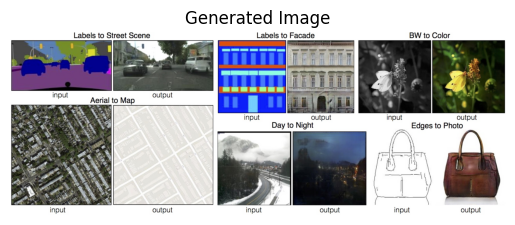

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/pix2pix-master/pix2pix-master/imgs/examples.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Extract ZIP file
zip_path = "/content/AU-GAN-main.zip"
extract_path = "/content/AU-GAN-main"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Find image files
image_folder = extract_path  # Adjust this if images are inside a subfolder

# Get all image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Step 3: Display images
def show_images(image_files, num_images=5):
    plt.figure(figsize=(10, num_images * 2))

    for i in range(min(num_images, len(image_files))):
        img = Image.open(os.path.join(image_folder, image_files[i]))


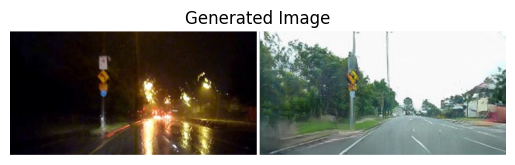

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/AU-GAN-main/AU-GAN-main/assets/augan_alderley.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

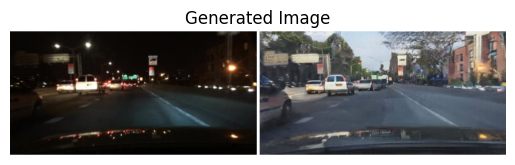

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/AU-GAN-main/AU-GAN-main/assets/augan_bdd.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

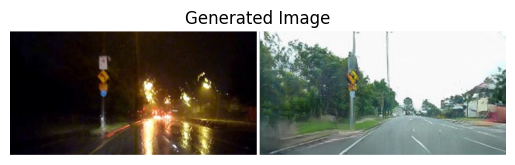

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/AU-GAN-main/AU-GAN-main/assets/augan_alderley.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

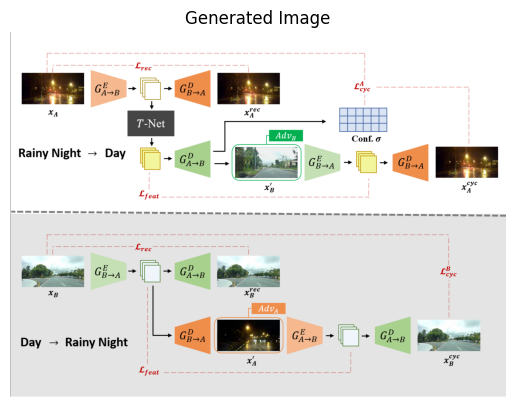

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/AU-GAN-main/AU-GAN-main/assets/augan_model.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

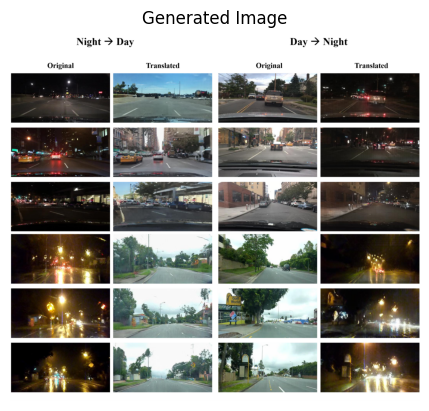

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/AU-GAN-main/AU-GAN-main/assets/augan_result.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

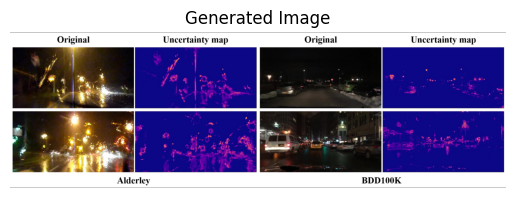

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/AU-GAN-main/AU-GAN-main/assets/augan_uncer.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Extract ZIP file
zip_path = "/content/MG-Cycle-GAN-main.zip"
extract_path = "/content/MG-Cycle-GAN-main"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Find image files
image_folder = extract_path  # Adjust this if images are inside a subfolder

# Get all image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Step 3: Display images
def show_images(image_files, num_images=5):
    plt.figure(figsize=(10, num_images * 2))

    for i in range(min(num_images, len(image_files))):
        img = Image.open(os.path.join(image_folder, image_files[i]))


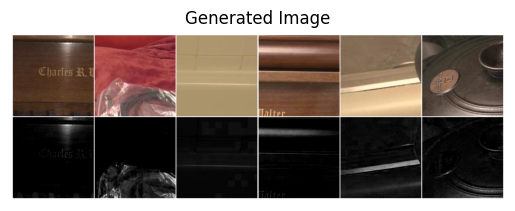

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/MG-Cycle-GAN-main/MG-Cycle-GAN-main/image/NMF.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

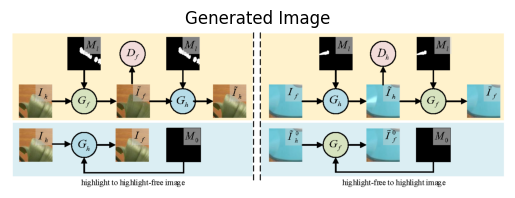

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/MG-Cycle-GAN-main/MG-Cycle-GAN-main/image/network.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

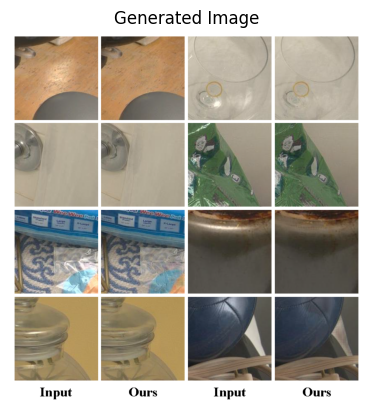

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/MG-Cycle-GAN-main/MG-Cycle-GAN-main/image/result.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

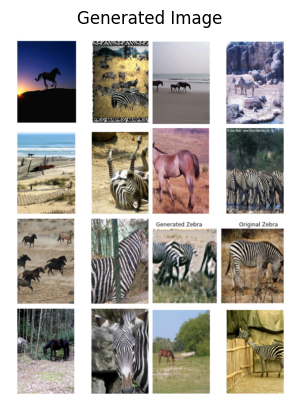

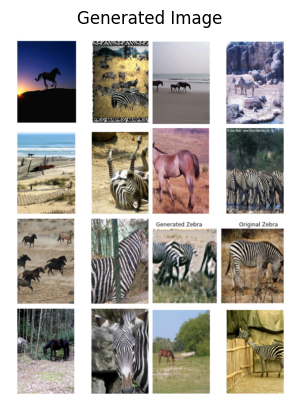

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/generat.h 2 zebra.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

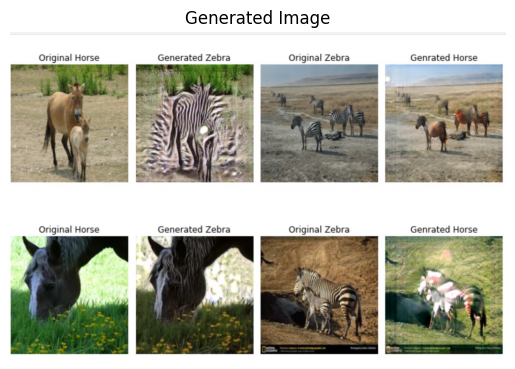

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/image 2 hr to zeb.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

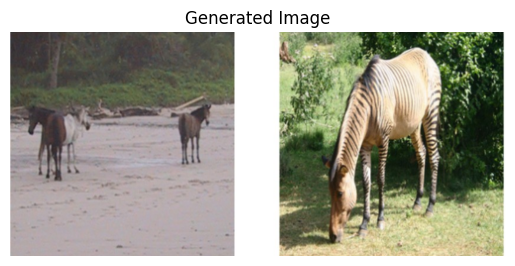

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.28.27_25bca9ee.jpg 16.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

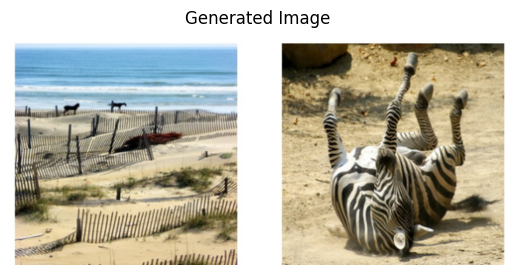

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.27.56_1445f7c8.jpg 15.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

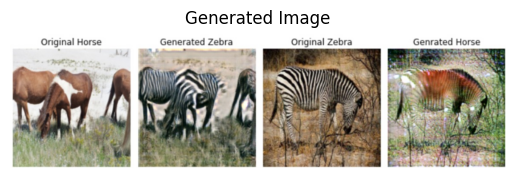

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.32.20_5e916085.jpg 22.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

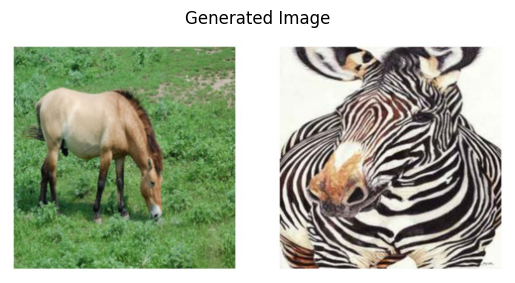

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.26.55_15d7d097.jpg 13.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

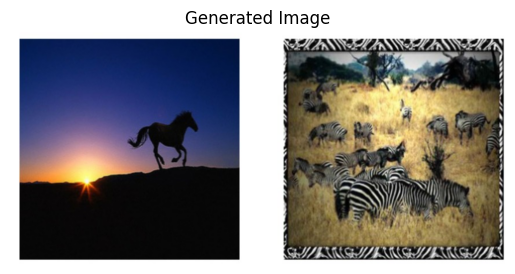

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.25.03_dee77bd5.jpg 11.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

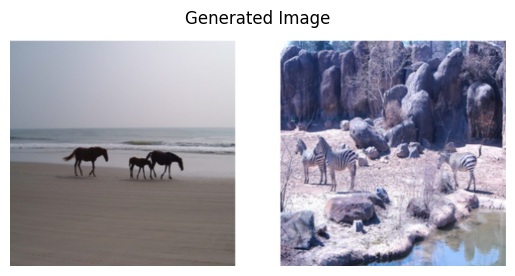

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.27.27_3c1706a0.jpg 14.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

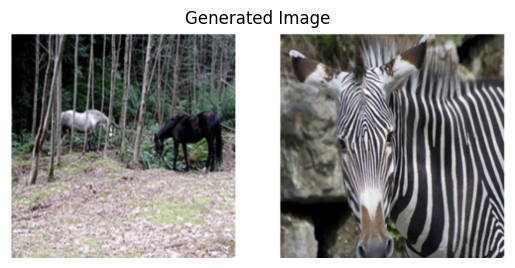

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.29.29_99b4bd18.jpg 19.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

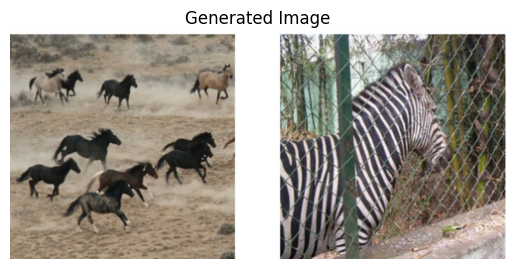

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.31.04_4133c39c.jpg 21.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

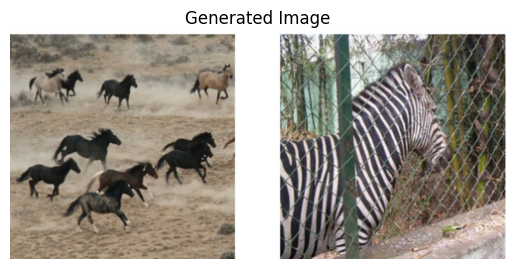

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.31.04_4133c39c.jpg 21.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

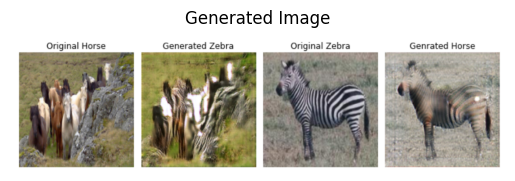

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/generastor 555.png"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

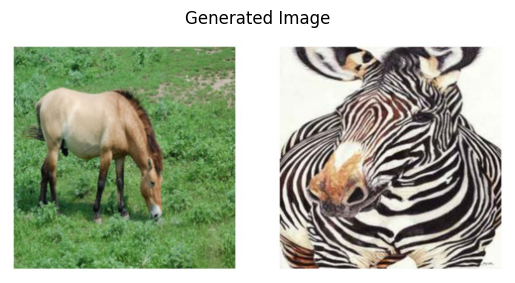

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-02-28 at 21.26.55_15d7d097.jpg 13.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

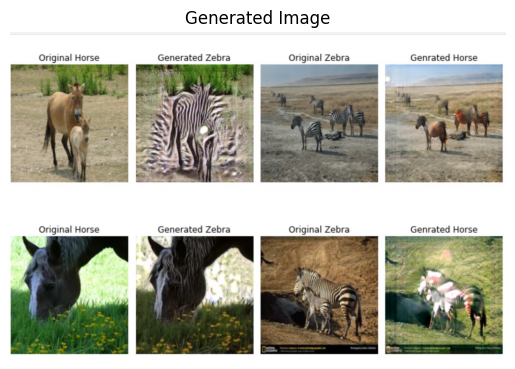

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/WhatsApp Image 2025-03-01 at 00.12.15_37854118.jpg 2222.jpg"  # Change this to your actual image path

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

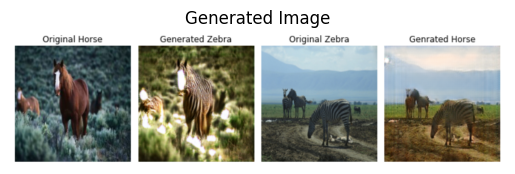

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/Screenshot 2025-03-01 092705.png  78678.png"
try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()
except FileNotFoundError:
    print(f"❌ Image not found at {image_path}. Check your extracted files.")

In [ ]:
import os

dataset_path = "/content/archive (16).zip"

if os.path.exists(dataset_path):
    print("File found! Proceeding with extraction...")
else:
    print("Error: ZIP file not found. Please check the file path.")


File found! Proceeding with extraction...


In [ ]:
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data'

In [ ]:
import os
import zipfile

dataset_path = "/content/archive (16).zip"
extract_path = "/content/data"

# Unzip the file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


BadZipFile: File is not a zip file

In [ ]:
import cv2
import torch
import numpy as np
import torchvision.transforms as transforms
from PIL import Image


In [ ]:
!git clone https://github.com/odegeasslbc/FastGAN-pytorch.git
%cd FastGAN-pytorch


Cloning into 'FastGAN-pytorch'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 192 (delta 44), reused 57 (delta 36), pack-reused 108 (from 1)
Receiving objects: 100% (192/192), 151.64 KiB | 1.74 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/FastGAN-pytorch


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 MB 9.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from models import Generator  # Ensure this is correct based on the repo structure


In [ ]:
import os
print(os.path.exists("generator.pth"))  # Should return True if the file exists
print(os.listdir())  # Lists all files in the current directory



False
['scripts', 'lpips', 'diffaug.py', 'eval.py', '.git', '.gitignore', 'README.md', 'requirements.txt', 'docker', '__pycache__', 'operation.py', 'models.py', 'benchmarking', 'LICENSE', 'train.py']


In [ ]:
!wget "https://your_model_link.com/generator.pth" -O generator.pth  # Replace with actual URL


--2025-02-28 14:28:55--  https://your_model_link.com/generator.pth
Resolving your_model_link.com (your_model_link.com)... failed: Name or service not known.
wget: unable to resolve host address ‘your_model_link.com’


In [ ]:
class ImageTranslationDataset(Dataset):
    def __init__(self, input_dir, target_dir, transform=None):
        self.input_images = sorted(glob.glob(f"{input_dir}/*.jpg"))
        self.target_images = sorted(glob.glob(f"{target_dir}/*.jpg"))
        self.transform = transform

    def __len__(self):
        return min(len(self.input_images), len(self.target_images))

    def __getitem__(self, idx):
        input_image = Image.open(self.input_images[idx]).convert("RGB")
        target_image = Image.open(self.target_images[idx]).convert("RGB")

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image

# Update the paths based on extracted dataset structure
input_dir = "/content/data/trainA"  # Change this if needed
target_dir = "/content/data/trainB"  # Change this if needed

dataset = ImageTranslationDataset(input_dir, target_dir, transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

print("Dataset Loaded!")


In [ ]:
import os

model_path = "generator.pth"  # Update with the correct path

if not os.path.exists(model_path):
    print("❌ Error: File does not exist!")
elif os.path.getsize(model_path) == 0:
    print("❌ Error: File is empty! Download or retrain the model.")
else:
    print("✅ Model file exists and is not empty.")


❌ Error: File is empty! Download or retrain the model.


In [ ]:
import os

model_url = "https://your_model_url.com/generator.pth"  # Replace with actual URL
output_path = "generator.pth"

# Download using wget
os.system(f"wget '{model_url}' -O {output_path}")

# Check if the file exists after downloading
if os.path.exists(output_path) and os.path.getsize(output_path) > 0:
    print("✅ Model downloaded successfully!")
else:
    print("❌ Download failed. Check the URL.")


❌ Download failed. Check the URL.


In [ ]:
!pip install patool


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
!apt-get install unrar
!unrar x /content/testB.rar /content/dataset/


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/testB.rar

Creating    /content/dataset                                          OK
Extracting  /content/dataset/n02391049_920.jpg                             0%  OK 
Extracting  /content/dataset/n02391049_980.jpg                             1%  OK 
Extracting  /content/dataset/n02391049_1000.jpg                            2%  OK 
Extracting  /content/dataset/n02391049_1020.jpg                            3%  OK 
Extracting  /content/dataset/n02391049_1060.jpg                            4%  OK 
Extracting  /content/dataset/n02391049_1100.jpg                            4%  OK 
Extracting  /content/dataset/n02391049_1150.jpg      

In [ ]:
!apt-get install unrar -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!unrar x /content/testB.rar /content/dataset/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/testB.rar


Would you like to replace the existing file /content/dataset/n02391049_920.jpg
 42823 bytes, modified on 2017-03-10 01:53
with a new one
 42823 bytes, modified on 2017-03-10 01:53

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

In [ ]:
from IPython.display import clear_output as clear
!pip install tensorflow-addons
clear()

In [ ]:
import os
import keras
import numpy as np
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from random import random

# Data
import tensorflow.image as tfi
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [ ]:
!pip install tensorflow==2.15.0
!pip install tensorflow-addons


In [ ]:
!pip install keras-cv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 32.0 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.simplefilter("ignore")


In [ ]:
!pip install tensorflow-addons keras --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.8.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.


In [ ]:
from keras.layers import LayerNormalization


In [ ]:
!pip install tensorflow==2.15.0 tensorflow-addons==0.21.0 keras==2.15.0


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 21.6 MB/s eta 0:00:00
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.


In [ ]:
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])


In [ ]:
class ImageTranslationDataset(Dataset):
    def __init__(self, input_dir, target_dir, transform=None):
        self.input_images = sorted(glob.glob(f"{input_dir}/*.jpg"))
        self.target_images = sorted(glob.glob(f"{target_dir}/*.jpg"))
        self.transform = transform

    def __len__(self):
        return min(len(self.input_images), len(self.target_images))

    def __getitem__(self, idx):
        input_image = Image.open(self.input_images[idx]).convert("RGB")
        target_image = Image.open(self.target_images[idx]).convert("RGB")

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image

# Update the paths based on extracted dataset structure
input_dir = "/content/data/trainA"  # Change this if needed
target_dir = "/content/data/trainB"  # Change this if needed

dataset = ImageTranslationDataset(input_dir, target_dir, transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

print("Dataset Loaded!")


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
# Visualizing
for i in range(10):
    id = np.random.randint(len(65))
    horse, zebra = horse_images[id], zebra_images[id]

    plt.figure(figsize=(10,8))

    plt.subplot(1,2,1)
    show_image(horse)

    plt.subplot(1,2,2)
    show_image(zebra)
    plt.show()

TypeError: object of type 'int' has no len()

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])


In [ ]:
criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerD = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))


NameError: name 'G' is not defined

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 128, 4, 1, 0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

G = Generator().cuda()


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
class ImageTranslationDataset(Dataset):
    def __init__(self, input_dir, target_dir, transform=None):
        self.input_images = sorted(glob.glob(f"{input_dir}/*.jpg"))
        self.target_images = sorted(glob.glob(f"{target_dir}/*.jpg"))
        self.transform = transform

    def __len__(self):
        return min(len(self.input_images), len(self.target_images))

    def __getitem__(self, idx):
        input_image = Image.open(self.input_images[idx]).convert("RGB")
        target_image = Image.open(self.target_images[idx]).convert("RGB")

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image

# Update the paths based on extracted dataset structure
input_dir = "/content/data/trainA"  # Change this if needed
target_dir = "/content/data/trainB"  # Change this if needed

dataset = ImageTranslationDataset(input_dir, target_dir, transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

print("Dataset Loaded!")


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
import patool

rar_path = "/content/testB.rar"
extract_path = "/content/dataset"

# Extract the dataset
patool.extract_archive(rar_path, outdir=extract_path)

print("✅ Extraction complete!")


In [ ]:
import os
import patoolib  # Install with `pip install patool`

rar_path = "/content/testB.rar"
extract_path = "/content/dataset"

# Extract the dataset
patoolib.extract_archive(rar_path, outdir=extract_path)

print("✅ Extraction complete!")


ModuleNotFoundError: No module named 'patoolib'

In [ ]:


import os
import torch
from models import Generator  # Ensure correct import

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Locate model
model_path = "generator.pth"

if not os.path.exists(model_path):
    print("❌ Error: Model file not found! Please check the path or download/train the model.")
else:
    netG = Generator().to(device)
    netG.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    netG.eval()
    print("✅ Model loaded successfully!")


EOFError: 

In [ ]:
model_path = "/correct/path/to/generator.pth"
netG.load_state_dict(torch.load(model_path, map_location=device))


<ipython-input-9-20b0218f2f97>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  netG.load_state_dict(torch.load(model_path, map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: '/correct/path/to/generator.pth'

In [ ]:
import torch
from models import Generator  # Import the Generator class from the repo

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize and load the trained Generator model
netG = Generator().to(device)
netG.load_state_dict(torch.load("generator.pth", map_location=device))
netG.eval()


<ipython-input-7-b50b5b506479>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  netG.load_state_dict(torch.load("generator.pth", map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: 'generator.pth'

In [ ]:
if frame is None:
    print("Failed to capture image")
    # You can exit or handle the error here
else:
    frame = cv2.resize(frame, (512, 512))


Failed to capture image


In [ ]:
# For webcam capture
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if not ret:
    print("Failed to grab frame from webcam")
    # Handle the error or try another method
else:
    frame = cv2.resize(frame, (512, 512))


Failed to grab frame from webcam


In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Capture an image from webcam (Uncomment for local system)
# cap = cv2.VideoCapture(0)
# ret, frame = cap.read()
# cap.release()

# Load an image instead
frame = cv2.imread("/content/person.jpg")  # Replace with your image path

# Resize for processing
frame = cv2.resize(frame, (512, 512))

# Display image
cv2_imshow(frame)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load an image (Replace with your file path)
frame = cv2.imread("/content/person.jpg")

# Check if the image is loaded successfully
if frame is None:
    print("Error: Image not found. Check the file path!")
else:
    # Resize for processing
    frame = cv2.resize(frame, (512, 512))

    # Display image in Colab
    cv2_imshow(frame)

Error: Image not found. Check the file path!


In [ ]:
from rembg import remove
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Only for Google Colab

# Load Image
image_path = "/content/person.jpg"  # Replace with your image path
try:
    input_image = Image.open(image_path)
except FileNotFoundError:
    print("Error: Image not found. Check the file path!")
    exit()

# Remove Background
output_image = remove(input_image)

# Convert RGBA (rembg output) to BGR for OpenCV
person_no_bg = np.array(output_image)

# If rembg returns an image with 4 channels (RGBA), convert to 3 channels (RGB → BGR)
if person_no_bg.shape[-1] == 4:
    person_no_bg = cv2.cvtColor(person_no_bg, cv2.COLOR_RGBA2RGB)

# Resize Image
person_no_bg = cv2.resize(person_no_bg, (512, 512))

# Display Image (For Colab)
cv2_imshow(person_no_bg)  # Use cv2.imshow() for local systems

ModuleNotFoundError: No module named 'onnxruntime'

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx